# Preprocessing Summary

In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corr_matrix_electric = joblib.load("files/output/2025_03_12-corr_matrix_electric.pk1")

In [3]:
corr_table = corr_matrix_electric.corr()["electric_energy_consumption"].sort_values(ascending=False)
print(corr_table)

electric_energy_consumption     1.000000
mass_vehicle                    0.723015
engine_power                    0.523713
vehicle_type_GE                 0.497204
manufacturer_name_eu_AUDI AG    0.415049
                                  ...   
vehicle_type_FA1               -0.359909
vehicle_type_DBG               -0.366432
commercial_name_SPRING         -0.366433
manufacturer_name_eu_DACIA     -0.366435
member_state_FR                -0.377660
Name: electric_energy_consumption, Length: 299, dtype: float64


Index(['mass_vehicle', 'engine_power', 'vehicle_type_GE',
       'manufacturer_name_eu_AUDI AG'],
      dtype='object')


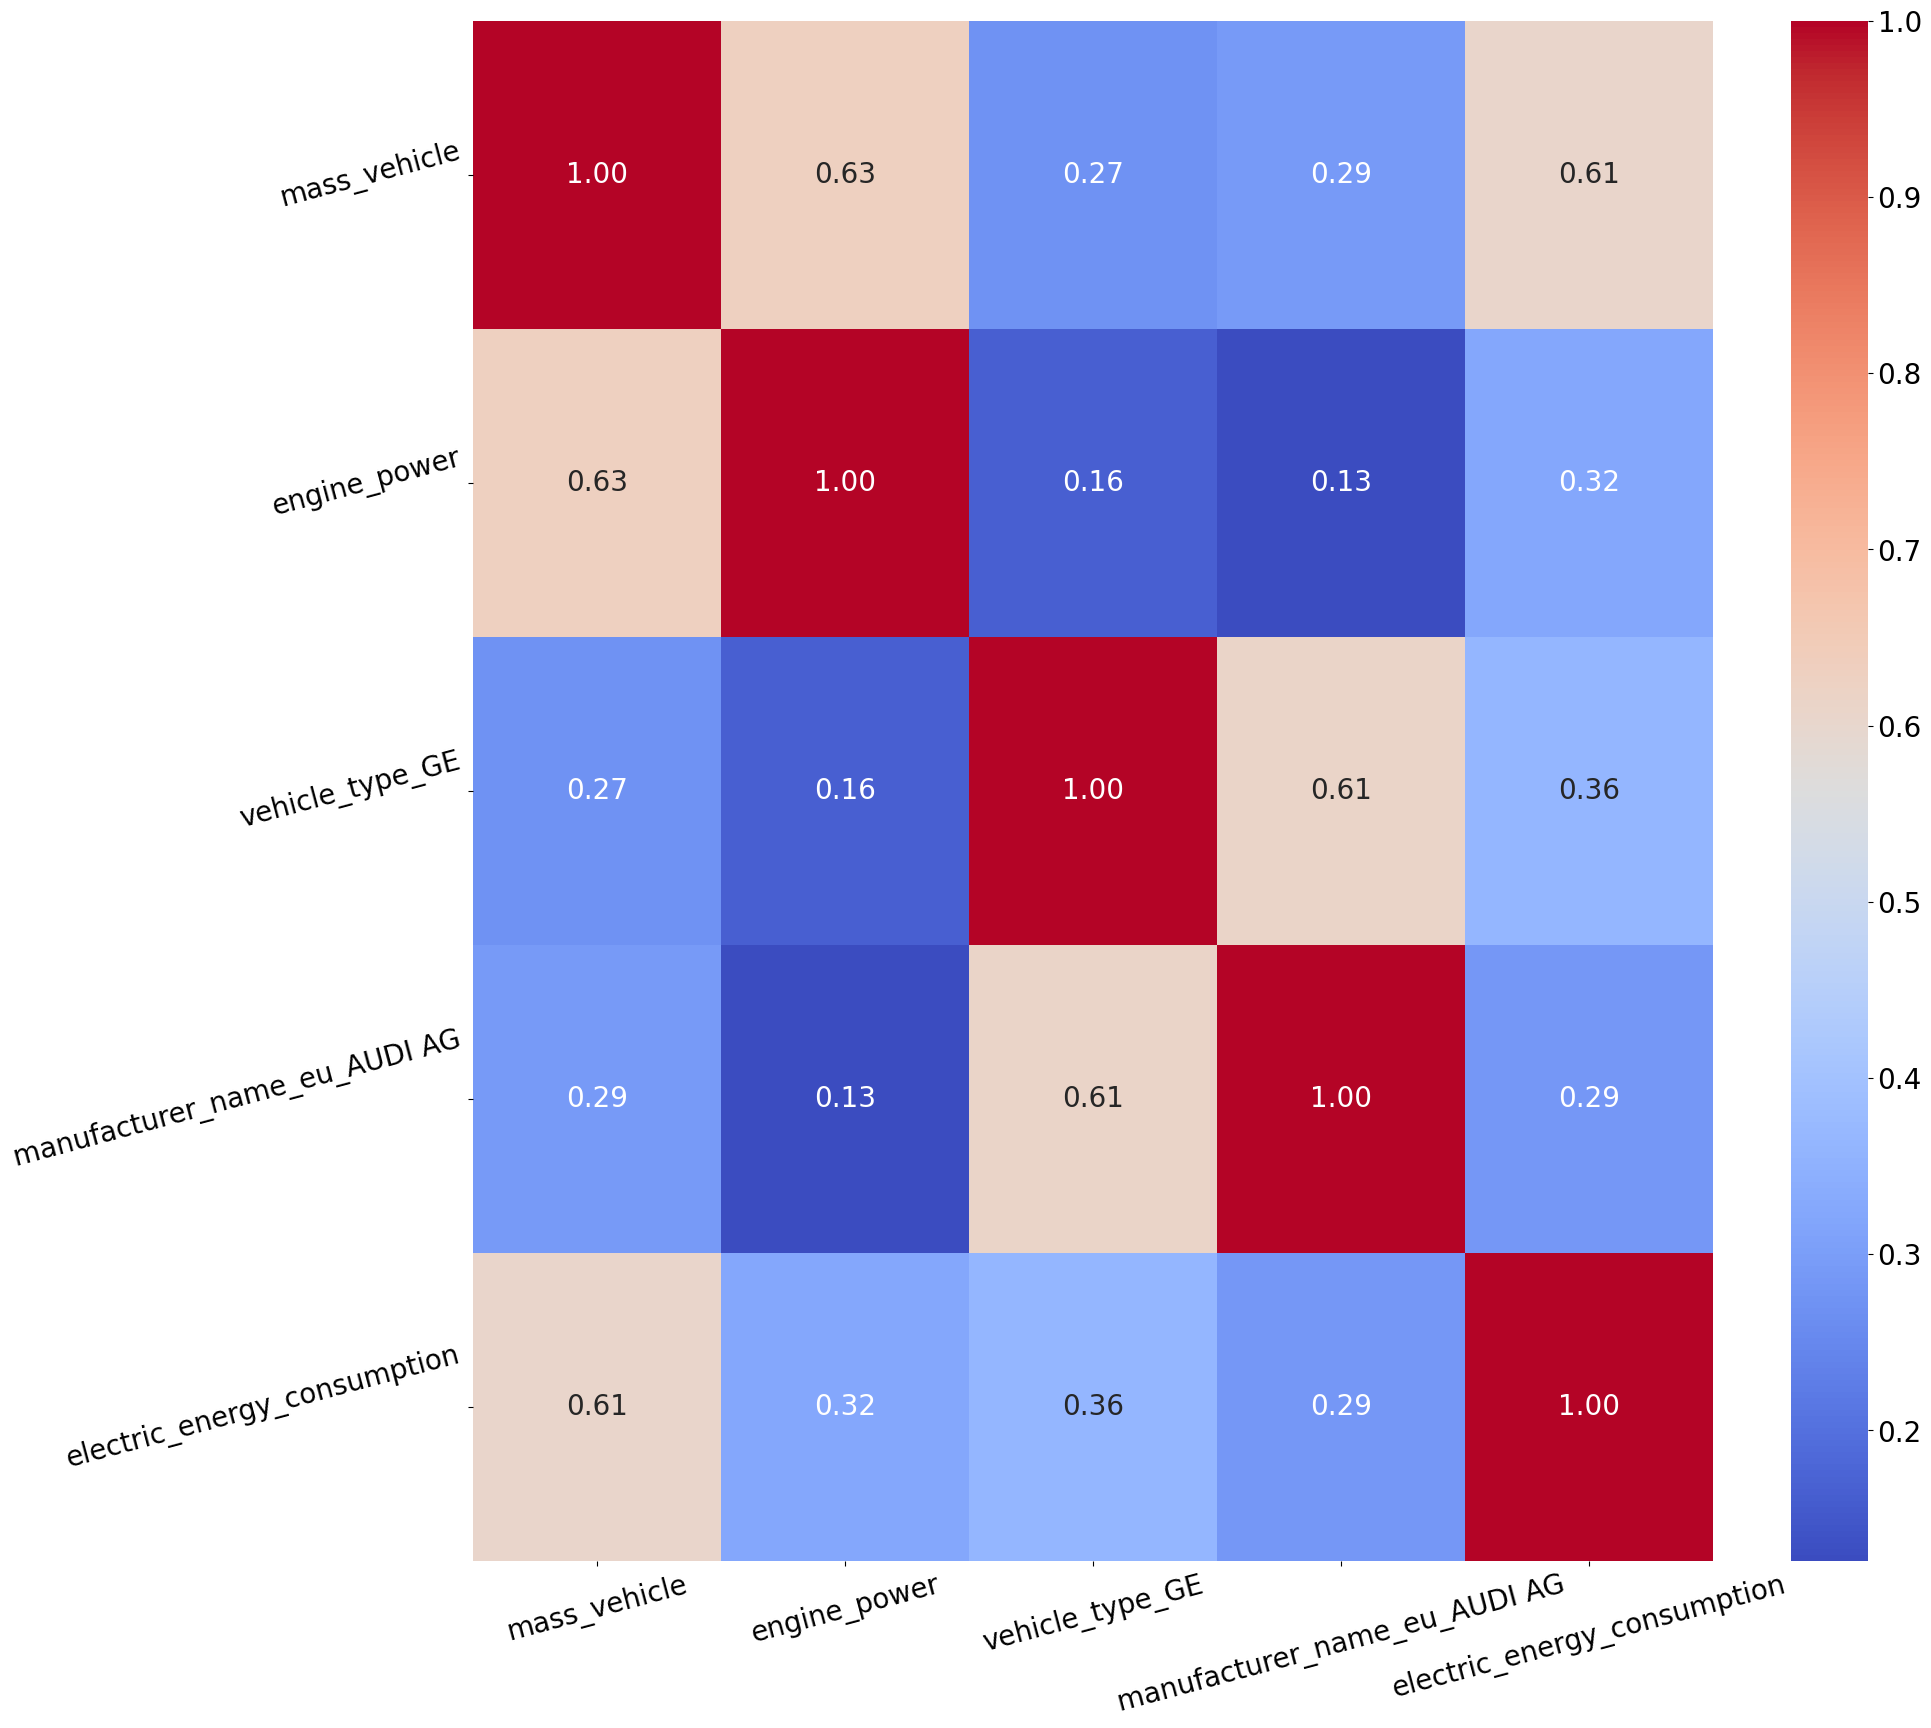

In [25]:
number_of_most_correlated_vars = 4
font_size = 20
# Select the top 10 most correlated variables to electric_energy_consumption
top_corr_vars = corr_table.index[1:number_of_most_correlated_vars+1]  # Exclude the first one as it is the target itself
print(top_corr_vars)
# Add electric_energy_consumption to the top_corr_vars
top_corr_vars_with_target = top_corr_vars.tolist() + ['electric_energy_consumption']

# Create a subset of the correlation matrix with these variables
# corr_matrix_subset = corr_matrix_electric.loc[top_corr_vars, top_corr_vars]
corr_matrix_subset = corr_matrix_electric.loc[top_corr_vars_with_target, top_corr_vars_with_target]

# Plot the heatmap
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr_matrix_subset, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": font_size})
# Increase colorbar font size
ax.collections[0].colorbar.ax.yaxis.set_tick_params(labelsize=font_size)
# plt.title('Heatmap of Top Correlated Variables to Electric Energy Consumption', fontsize=font_size+3)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xticks(rotation=15)  # Rotate x-axis labels
plt.yticks(rotation=15)   # Rotate y-axis labels
plt.show()